# 30 Day Chart Challenge

Data: International Labour Organization

Tasa de participación laboral según sexo y edad, porcentaje anual.

Source:https://rshiny.ilo.org/dataexplorer12/?lang=en&segment=indicator&id=EAP_DWAP_SEX_AGE_RT_A&ref_area=DZA&_gl=1*cyzbik*_ga*MTYwMjAzOTMzMi4xNzE1MjA0Mjcy*_ga_1MGT4WT12L*MTcxNTIwNjc1OS4yLjEuMTcxNTIwNjg2NS42MC4wLjA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("data/rshiny/EAP_DWAP_SEX_AGE_RT_A-filtered-2024-11-08.csv")
df.head()

,ref_area.label,source.label,indicator.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Algeria,LFS - Household Employment Survey,Labour force participation rate by sex and age...,Sex: Total,"Age (Youth, adults): 15+",2017,41.77,NaN,NaN,NaN,NaN
1,Algeria,LFS - Household Employment Survey,Labour force participation rate by sex and age...,Sex: Total,"Age (Youth, adults): 15-24",2017,26.42,NaN,NaN,NaN,NaN
2,Algeria,LFS - Household Employment Survey,Labour force participation rate by sex and age...,Sex: Total,"Age (Youth, adults): 25+",2017,46.45,NaN,NaN,NaN,NaN
3,Algeria,LFS - Household Employment Survey,Labour force participation rate by sex and age...,Sex: Male,"Age (Youth, adults): 15+",2017,66.04,NaN,NaN,NaN,NaN
4,Algeria,LFS - Household Employment Survey,Labour force participation rate by sex and age...,Sex: Male,"Age (Youth, adults): 15-24",2017,42.38,NaN,NaN,NaN,NaN


In [4]:
df.shape

(427, 11)

In [5]:
broad_age_groups = ['Age (Aggregate bands): <15', 'Age (Youth, adults): 15+', 'Age (Youth, adults): 15-64']
filtered_data = df[df['classif1.label'].isin(broad_age_groups)]
filtered_data.head()

,ref_area.label,source.label,indicator.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Algeria,LFS - Household Employment Survey,Labour force participation rate by sex and age...,Sex: Total,"Age (Youth, adults): 15+",2017,41.770,NaN,NaN,NaN,NaN
3,Algeria,LFS - Household Employment Survey,Labour force participation rate by sex and age...,Sex: Male,"Age (Youth, adults): 15+",2017,66.040,NaN,NaN,NaN,NaN
6,Algeria,LFS - Household Employment Survey,Labour force participation rate by sex and age...,Sex: Female,"Age (Youth, adults): 15+",2017,17.130,NaN,NaN,NaN,NaN
45,Algeria,LFS - Household Employment Survey,Labour force participation rate by sex and age...,Sex: Total,"Age (Youth, adults): 15+",2016,41.871,NaN,NaN,NaN,NaN
48,Algeria,LFS - Household Employment Survey,Labour force participation rate by sex and age...,Sex: Male,"Age (Youth, adults): 15+",2016,66.487,NaN,NaN,NaN,NaN


In [6]:
pivot_data = filtered_data.pivot_table(values='obs_value', index='time', columns='classif1.label', aggfunc='mean')
pivot_data

classif1.label,"Age (Youth, adults): 15+","Age (Youth, adults): 15-64"
time,,
2008,41.700000,NaN
2009,41.346667,44.29
2010,41.576667,44.51
2011,40.150000,NaN
2012,41.866667,NaN
2013,43.100000,NaN
2014,40.987000,NaN
2015,41.613333,NaN
2016,41.766000,NaN


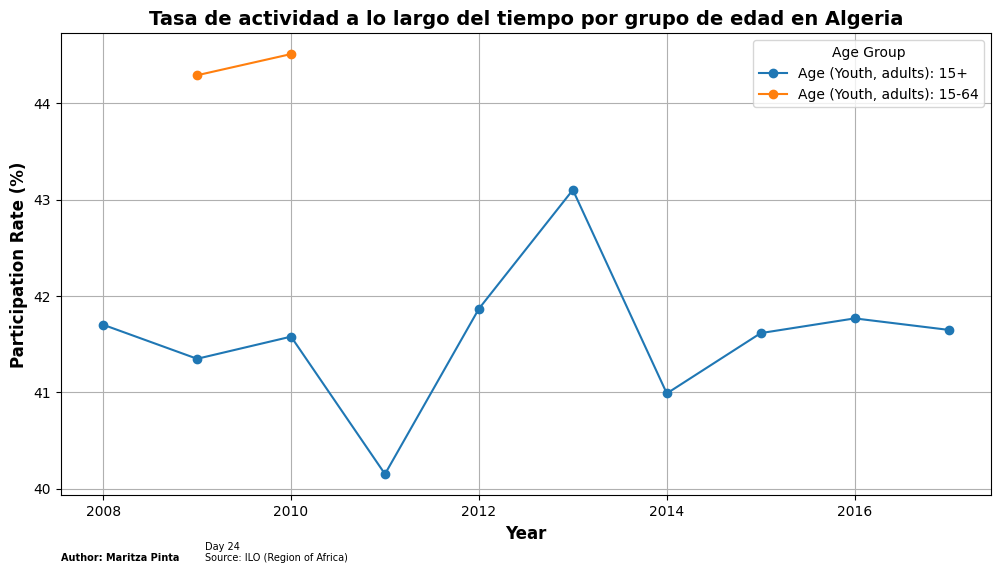

In [9]:
# Chart
plt.figure(figsize=(12, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)

plt.title('Tasa de actividad a lo largo del tiempo por grupo de edad en Algeria', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Participation Rate (%)', fontsize=12, fontweight='bold')
plt.legend(title='Age Group')
plt.grid(True)

plt.gcf().text(0.125, 0.0001, 'Author: Maritza Pinta', fontsize=7, color='black', ha='left', fontweight='bold')
plt.gcf().text(0.245, 0.0001, 'Day 24\nSource: ILO (Region of Africa)', fontsize=7, color='black', ha='left')

plt.savefig('data/rshiny/algeria.png', dpi=300, bbox_inches='tight')

plt.show()